# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [19]:
# Import the titanic dataset here
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal, facet_wrap
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [20]:
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


In [21]:
df_titanic["class"].unique()

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew',
       'restaurant staff', 'deck crew'], dtype=object)

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [22]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "deck crew": "crew",
    "engineering crew": "crew",
    "restaurant staff": "crew",
    "victualling crew": "crew"
    })

In [23]:
df_passengers = df_titanic[df_titanic["type"] == "passenger"]

In [32]:
pd.crosstab(df_passengers["class"], df_passengers["embarked"], normalize=True)

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [ ]:
df_third = df_passengers[df_passengers["class"] == "3rd"]
df_third["embarked"].value_counts(normalize=True)


In [46]:
joint_dist = pd.crosstab(df_passengers["class"], df_passengers["embarked"], normalize=True)
joint_dist
marginal_class = joint_dist.sum(axis=1)
conditional_dist_class = joint_dist.divide(marginal_class, axis=0)
conditional_dist_class

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [47]:
joint_dist = pd.crosstab( df_passengers["embarked"],df_passengers["class"], normalize=True)
joint_dist
marginal_embarked = joint_dist.sum(axis=1)
conditional_dist_embarked = joint_dist.divide(marginal_embarked, axis=0)
conditional_dist_embarked

class,1st,2nd,3rd
embarked,,,
B,0.333333,0.666667,0.000000
C,0.527675,0.095941,0.376384
Q,0.024390,0.056911,0.918699
S,0.191466,0.268053,0.540481


In [17]:
pd.crosstab(df_passengers["embarked"], df_passengers["class"], normalize="index")

class,1st,2nd,3rd
embarked,,,
B,0.333333,0.666667,0.000000
C,0.527675,0.095941,0.376384
Q,0.024390,0.056911,0.918699
S,0.191466,0.268053,0.540481


In [18]:
pd.crosstab(df_passengers["class"], df_passengers["embarked"], normalize="index")

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [ ]:
# 0.6968 of 3rd class passengers embarked at Southampton.
# 0.5405 of Southampton passengers were in 3rd class.


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

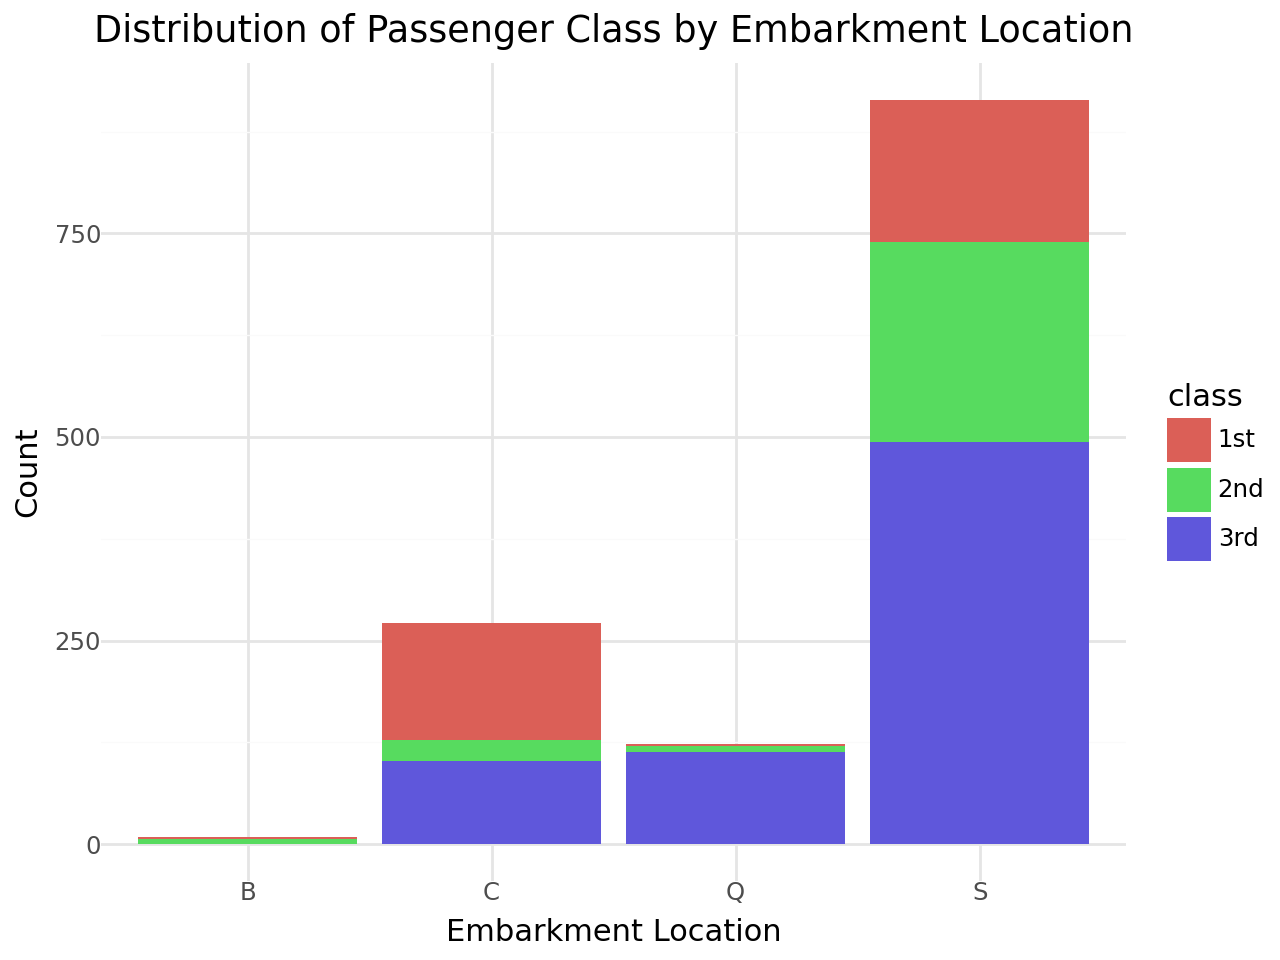

In [57]:
(ggplot(df_passengers, aes(x='embarked', fill = "class")) +
    geom_bar() +  # Create separate plots for each embarkment location
    labs(title="Distribution of Passenger Class by Embarkment Location",
         x="Embarkment Location",
         y="Count",
         fill="class") +
    theme_minimal()
)

A major con of using this visualization to determine the conditional probability of a passenger's class, given where they embarked is that it does not provide probabilities. It only provides counts of the classes for each embarkment location. However a pro is that it is easier to quickly look at each embarkment location and determine where most people left from and what their class was. The visualization is great for quick interpretation, but the matrix is better for indept comparision.